IMPORTLIB

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV


LOADING_DATASET

In [109]:
df = pd.read_csv("data_prj/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Preprocessing

In [110]:
df.shape

(20640, 10)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [112]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [113]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [114]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


ENCODING

In [115]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [116]:
df = df.join(pd.get_dummies(df['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)
# Đổi tên cột loại bỏ ký tự đặc biệt
df.columns = df.columns.str.replace(r"[<>\[\]]", "", regex=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   1H OCEAN            20433 non-null  bool   
 10  INLAND              20433 non-null  bool   
 11  ISLAND              20433 non-null  bool   
 12  NEAR BAY            20433 non-null  bool   
 13  NEAR OCEAN          20433 non-null  bool   
dtypes: bool(5), float64(9)
memory usage: 1.7 MB


In [117]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [47]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

Thêm các thuộc tính phụ

In [48]:
# Thêm cách thuộc tính 
X['rooms_per_household'] = X['total_rooms'] / X['households'] #Đại diện cho những khu vực nhà ở lớn, rộng rãi, nơi mỗi hộ gia đình có nhiều phòng.
X['population_per_household'] = X['population'] / X['households'] #Biểu thị các khu vực đông đúc hoặc các hộ gia đình
X['household_density'] = X['households'] / X['population'] #Biểu diễn mật độ dân số trong khu vực
X['people_per_room'] = X['population'] / X['total_rooms'] #Số người trong 1 phòng 

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Scale đặc trưng
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale target
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Chuyển lại thành DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(y_scaled, columns=['median_house_value'])

# Kết hợp các đặc trưng đã scale và target đã scale lại
df_scaled = pd.concat([X_scaled_df, y_scaled_df], axis=1)

# Kiểm tra kết quả
df_scaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   total_rooms               20433 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20433 non-null  float64
 6   households                20433 non-null  float64
 7   median_income             20433 non-null  float64
 8   1H OCEAN                  20433 non-null  float64
 9   INLAND                    20433 non-null  float64
 10  ISLAND                    20433 non-null  float64
 11  NEAR BAY                  20433 non-null  float64
 12  NEAR OCEAN                20433 non-null  float64
 13  rooms_per_household       20433 non-null  float64
 14  popula

In [50]:
df_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,population_per_household,household_density,people_per_room,median_house_value
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,0.625395,-0.049433,0.288625,-0.087209,2.128819
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,0.324942,-0.092134,1.173673,-0.096728,1.313626
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,1.150594,-0.025797,-0.080207,-0.096766,1.258183
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,0.155467,-0.050162,0.301139,-0.062434,1.164622
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,0.342549,-0.085272,1.007058,-0.093618,1.172418


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_scaled_df, test_size=0.2, random_state=42)

# Kiểm tra kích thước dữ liệu
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16346, 17)
(16346, 1)
(4087, 17)
(4087, 1)


MODEL_TRAINING

In [52]:
def plot_predictions(y_test, y_pred):
    # Inverse transform y_test và y_pred
    y_test = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
    
    # Đổi thành array và flatten
    y_test = np.array(y_test).flatten()
    y_pred = np.array(y_pred).flatten()
    
    # Sắp xếp các giá trị theo y_test
    sorted_indices = np.argsort(y_test)  # Chỉ số sắp xếp theo y_test
    y_test_sorted = y_test[sorted_indices]  # Sắp xếp y_test
    y_pred_sorted = y_pred[sorted_indices]  # Sắp xếp y_pred tương ứng
    
    # Tạo trục x theo số thứ tự sau khi sắp xếp
    x = np.arange(len(y_test_sorted))  # Trục x chính xác
    
    # Vẽ đồ thị
    plt.figure(figsize=(80, 6))
    plt.plot(x, y_test_sorted, label="Giá trị thật (y_test)", color="blue", linewidth=2)
    plt.plot(x, y_pred_sorted, label="Giá trị dự đoán (y_pred)", color="red", linestyle="dashed", linewidth=2)
    plt.xlabel("Mẫu dữ liệu (sắp xếp theo y_test)")
    plt.ylabel("Giá trị")
    plt.title("So sánh giá trị thật và dự đoán")
    plt.legend()
    plt.grid(True)
    plt.show()


LinearRegression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pred_LR = modelLR.predict(X_test)
mse_LR = mean_squared_error(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)), 
    scaler_y.inverse_transform(y_pred_LR.reshape(-1, 1))
)
mae_LR = mean_absolute_error(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)), 
    scaler_y.inverse_transform(y_pred_LR.reshape(-1, 1))
)
r2_LR = r2_score(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)), 
    scaler_y.inverse_transform(y_pred_LR.reshape(-1, 1))
)


print(f"Mean Squared Error (MSE): {mse_LR}")
print(f"Mean Absolute Error (MAE): {mae_LR}")
print(f"R² Score: {r2_LR}")

Mean Squared Error (MSE): 4457846876.112833
Mean Absolute Error (MAE): 48649.5419126552
R² Score: 0.6740191631937553


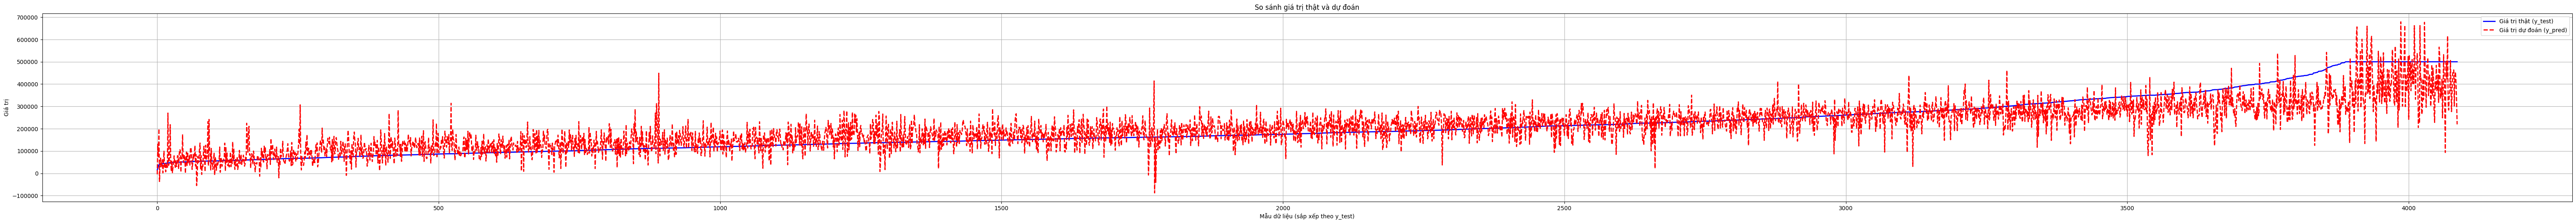

In [55]:
plot_predictions(y_test, y_pred_LR)

RIDGE

- GRID

In [56]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=42)
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # Các giá trị alpha để kiểm tra
}

- TRAIN

In [57]:
ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=5,
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)
ridge_grid.fit(X_train, y_train)

print(f"Best params: {ridge_grid.best_params_}")
print(f"Best score: {ridge_grid.best_score_}")
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)
mse_ridge = mean_squared_error(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)), 
    scaler_y.inverse_transform(y_pred_ridge.reshape(-1, 1))
)
mae_ridge = mean_absolute_error(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)), 
    scaler_y.inverse_transform(y_pred_ridge.reshape(-1, 1))
)
r2_ridge = r2_score(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)), 
    scaler_y.inverse_transform(y_pred_ridge.reshape(-1, 1))
)

print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R² Score: {r2_ridge}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'alpha': 100.0}
Best score: 0.6204286702891082
Mean Squared Error (MSE): 4465590530.496108
Mean Absolute Error (MAE): 48644.35629211655
R² Score: 0.673452907105121


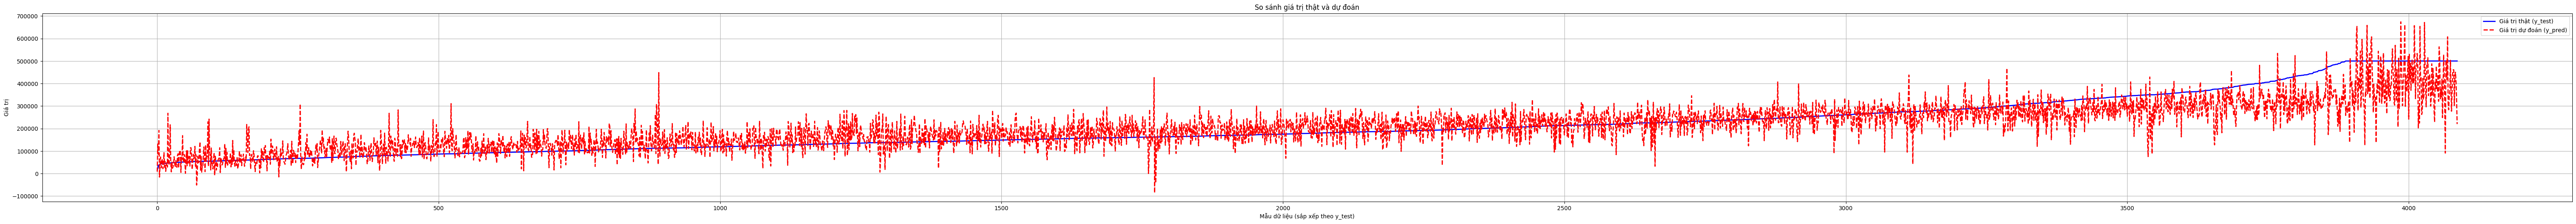

In [58]:
plot_predictions(y_test, y_pred_ridge)

RF

- GRID

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, bootstrap=True)
param_grid_rf = {
    'n_estimators': [250,500],            # Số lượng cây trong rừng
    'max_features': [0.6,0.8],            # Tỉ lệ số đặc trưng được sử dụng
    'max_depth': [10,20,None],             # Độ sâu tối đa của cây
    'max_samples': [0.6,0.8],                # Tỉ lệ mẫu được chọn cho mỗi cây
    'min_samples_split': [5,10],           # Số mẫu tối thiểu để phân chia một node
    'min_samples_leaf': [5,10]             # Số mẫu tối thiểu tại node lá
}

- FIT

In [60]:
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)
rf_grid.fit(X_train, y_train)
print(f"Best params: {rf_grid.best_params_}")
print(f"Best score: {rf_grid.best_score_}")
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
mse_rf = mean_squared_error(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)),
    scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1))
)
mae_rf = mean_absolute_error(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)),
    scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1))
)
r2_rf = r2_score(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)),
    scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1))
)

print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R² Score: {r2_rf}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best params: {'max_depth': None, 'max_features': 0.6, 'max_samples': 0.8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 250}
Best score: 0.8118324243718806
Mean Squared Error (MSE): 2516631609.915502
Mean Absolute Error (MAE): 32750.565428384718
R² Score: 0.8159708709311582


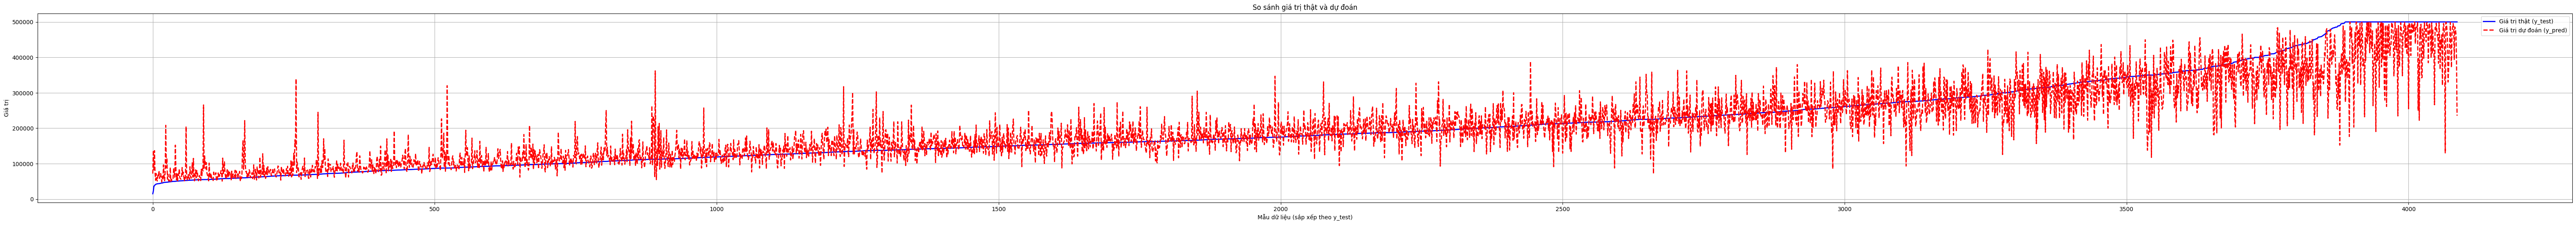

In [61]:
plot_predictions(y_test, y_pred_rf)

XGBOOST

IMPORT

In [62]:
import xgboost as xgb

DATA

BUILD MODEL

- GRID

In [63]:
param_grid_xgb = {
    "max_depth": [7, 8, 9],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6,0.8],
    "colsample_bytree": [0.6, 0.8],
    "n_estimators": [500, 800, 1000]
}

- TRAIN

In [64]:
xgb_regressor = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse"
)

grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error', 
    cv=5,  
    verbose=2, 
    n_jobs=-1,  
    refit=True  
)

grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

y_pred_xgb = best_model.predict(X_test)

mse_xgb = mean_squared_error(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)),
    scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))
)
mae_xgb = mean_absolute_error(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)),
    scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))
)
r2_xgb = r2_score(
    scaler_y.inverse_transform(y_test.values.reshape(-1, 1)),
    scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))
)

print(f"Best Model Pexgbormance: MAE={mae_xgb}, MSE={mse_xgb}, R2={r2_xgb}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.8}
Best Model Pexgbormance: MAE=28684.095644344874, MSE=1976384961.6688175, R2=0.8554765020960374


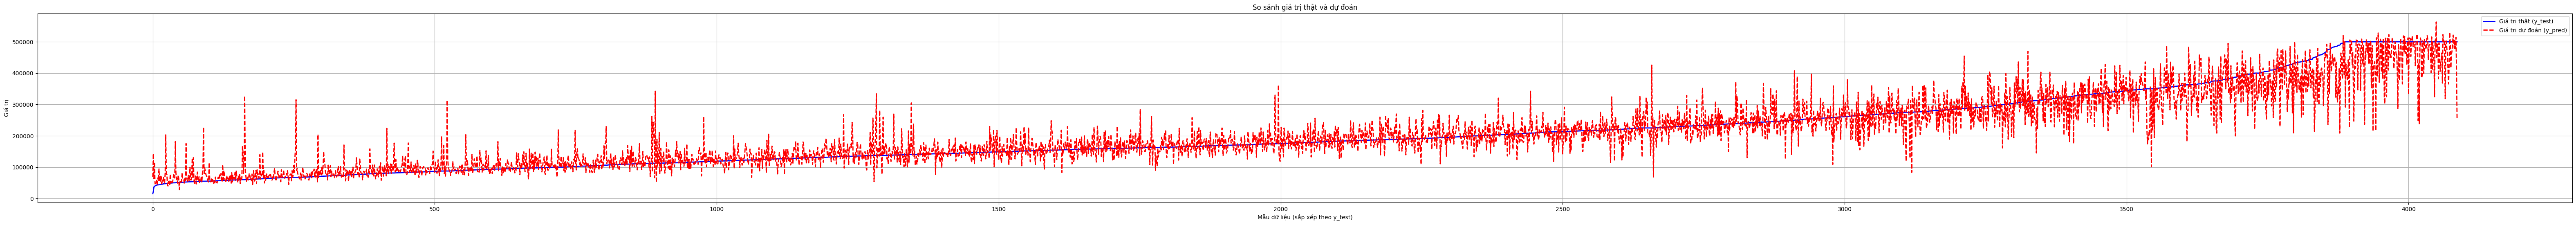

In [65]:

plot_predictions(y_test, y_pred_xgb)

PREDICTIVE SYSTEM

Do XGBoost có độ chính xác cao nhất nên ta sẽ sử dụng mô hình để dự đoán 

In [103]:
def pred(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity):
    # Mapping ocean_proximity sang giá trị số (nếu đã dùng map)
    ocean_mapping = {
    "<1H OCEAN": [1, 0, 0, 0, 0],
    "INLAND": [0, 1, 0, 0, 0],
    "NEAR OCEAN": [0, 0, 1, 0, 0],
    "NEAR BAY": [0, 0, 0, 1, 0],
    "ISLAND": [0, 0, 0, 0, 1],
}
    
    
    # Lấy danh sách dummy tương ứng
    ocean_dummies = ocean_mapping[ocean_proximity]


    # Kết hợp tất cả đặc trưng vào một danh sách
    input_features = [
        longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
        population, households, median_income
    ] + ocean_dummies
    rooms_per_household = total_rooms / households #Đại diện cho những khu vực nhà ở lớn, rộng rãi, nơi mỗi hộ gia đình có nhiều phòng.
    population_per_household = population / households #Biểu thị các khu vực đông đúc hoặc các hộ gia đình
    household_density = households / population #Biểu diễn mật độ dân số trong khu vực
    people_per_room = population / total_rooms #Số người trong 1 phòng 
    input_features += [rooms_per_household, population_per_household, household_density, people_per_room]
    # Biến đổi thành numpy array
    input_features = np.array(input_features).reshape(1, -1)
    input_features = scaler_X.transform(input_features)

    # Dự đoán
    prediction = best_model.predict(input_features)
    return scaler_y.inverse_transform(prediction[0].reshape(-1, 1))[0][0]


In [104]:
pred(-122.25,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,"NEAR BAY") #452600.0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


448723.8

SAVING MODEL

In [105]:
import pickle

pickle.dump(best_model, open("best_xgboost_model.pkl", "wb"))
pickle.dump(scaler_X,open("scalerInput.pkl","wb"))
pickle.dump(scaler_y,open("scalerOutput.pkl","wb"))

